### Computing limits of function
* Notation
$
\lim_{x \to a}f(x) \\
$
* Example
$
\lim_{x \to 4} \dfrac{x^2}{2} \\
\dfrac{4^2}{2} = 8 
$

In [120]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math
from matplotlib import style
style.use('classic')

In [121]:
x = sym.symbols('x')

fx = x**3
lim_pnt = 1.5
lim = sym.limit(fx, x, lim_pnt)

display(Math('\\lim_{x \\to %g} %s = %g' %(lim_pnt, sym.latex(fx), lim)))

<IPython.core.display.Math object>

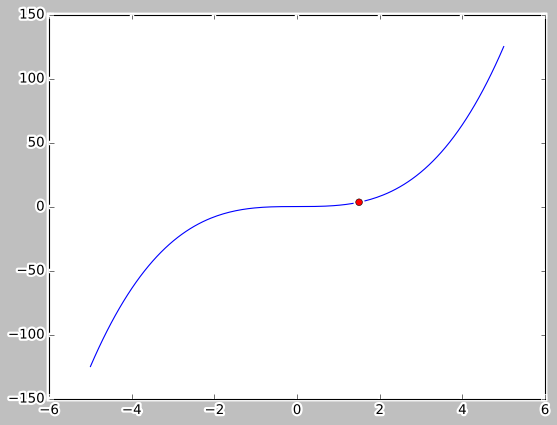

In [122]:
fxx = sym.lambdify(x, fx)
xx = np.linspace(-5, 5, 200)

plt.plot(xx, fxx(xx),)
plt.plot(lim_pnt, lim, 'ro')
plt.show()

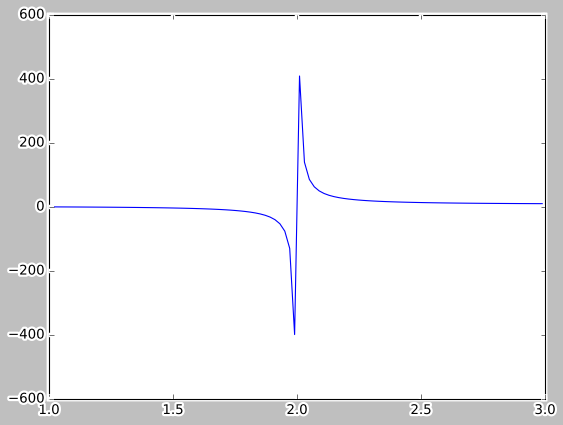

<IPython.core.display.Math object>

In [123]:
fx = (x**2)/(x-2)
fxx = sym.lambdify(x, fx)
xx = np.linspace(1, 3, 102)

lim_pnt = 2
lim = sym.limit(fx, x, lim_pnt, dir='-')

plt.plot(xx, fxx(xx))
plt.show()
display(Math('\\lim_{x \\to %g^-} %s = %g' %(lim_pnt, sym.latex(fx), lim)))

#### Exercise
* Implement and plot functions
$
f(x) = e^{-x} \sqrt{x+1} \\
g(x) = \cos(x + \sin(x)) \\
$
* Confirm this propery of limits
$
\frac{\lim_{x \to 5}f(x)}{\lim_{x \to 5}g(x)} = \lim_{x \to 5} \dfrac{f(x)}{g(x)} \\
$

In [88]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math

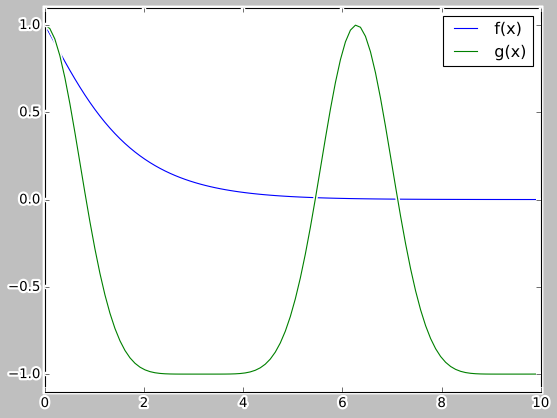

In [124]:
x = sym.symbols('x')

fx = sym.sqrt(x+1)*sym.exp(-x)
gx = sym.cos(x + sym.sin(x))

fxx = sym.lambdify(x, fx)
gxx = sym.lambdify(x, gx)

xx = np.linspace(0, 10, 100)

plt.plot(xx, fxx(xx), label='f(x)')
plt.plot(xx, gxx(xx), label='g(x)')
plt.ylim(-1.1, 1.1)
plt.legend()
plt.show()

In [125]:
lim_pnt = 5

# compute  the limits of f and g separetly
lim_fx = sym.limit(fx, x, lim_pnt)
lim_gx = sym.limit(gx, x, lim_pnt)

# compute the limit of f/g
hx = fx/gx
lim_fgx = sym.limit(hx, x, lim_pnt)

display(Math('\\frac{\\lim_{x \\to %g} f(x)}{\\lim_{x \\to %g} f(g)} = \\frac{%g}{%g} = %g'  \
             %(lim_pnt, lim_pnt, lim_fx, lim_gx, lim_fx/lim_gx)))

display(Math('\\lim_{x \\to %g} \\frac{f(x)}{f(g)} = %g' %(lim_pnt, lim_fgx)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Piecewise functions
$
f(x) = 
\begin{cases}
0 & \quad \text{if } x \leq 0 \\
-2x & \quad \text{if } x \gt 0
\end{cases}
$

In [126]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display, Math

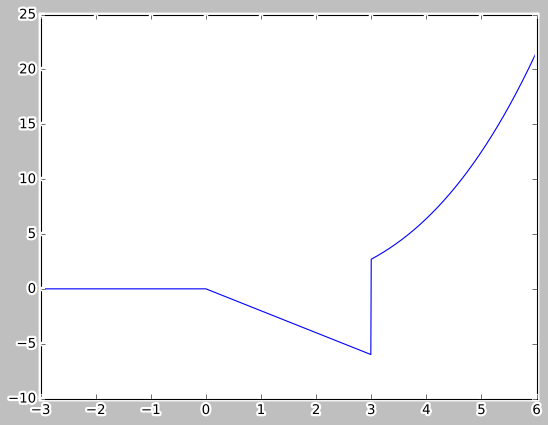

In [127]:
from sympy.abc import x

piece1 = 0
piece2 = -2*x
piece3 = x**3/10

fx = sym.Piecewise((piece1, x<0), (piece2, (x>=0) & (x<3)), (piece3, x>=0))

fxx = sym.lambdify(x, fx)
xx = np.linspace(-3, 6, 1234)

plt.plot(xx, fxx(xx))
plt.show()


#### Excercises

Implement this function, print it out in LaTeX and make a graph in xkcd style.

$
f(x) = 
\begin{cases}
x^3 & \quad \text{for } x \leq 0 \\
\log_2{(x)} & \quad \text{otherwise} 
\end{cases}
$

<IPython.core.display.Math object>

<lambdifygenerated-31>:2: RuntimeWarning: divide by zero encountered in log
  return select([less_equal(x, 0),True], [x**3,log(x)/log(2)], default=nan)
<lambdifygenerated-31>:2: RuntimeWarning: invalid value encountered in log
  return select([less_equal(x, 0),True], [x**3,log(x)/log(2)], default=nan)


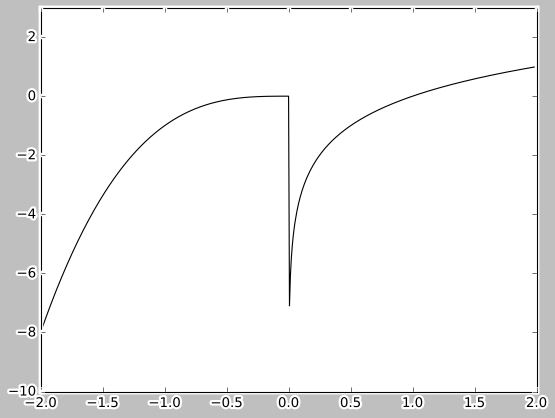

In [93]:
x = sym.symbols('x')
piece1 = x**3
piece2 = sym.log(x, 2)

fx = sym.Piecewise((piece1, x<=0), (piece2, x>0))
fxx = sym.lambdify(x, fx)

display(Math('f(x) = ' + sym.latex(fx)))

#plt.xkcd()
plt.plot(xx, fxx(xx), 'k')
    
plt.xlim([-2, 2])
plt.ylim([-10, 3])
plt.show()

### Derivatives of polynomials
$
\frac{d}{dx}x^2 = 2x^1 \\
\frac{d}{dx}x^3 = 2x^2 \\
\frac{d}{dx}(3x^3) = 9x^2\\
$
general formula
$
\frac{d}{dx}(ax^n) = nax^{(n-1)}\\
$

In [94]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [95]:
x = sym.symbols('x')

fx = x**2
dfx = sym.diff(fx)

In [96]:
# Leibniz notation
display(Math('f(x) = %s, \\quad \\frac{df}{dx}=%s' %(sym.latex(fx), sym.latex(dfx))))
# Lagrange notation
display(Math('f(x) = %s, \\quad f\'=%s' %(sym.latex(fx), sym.latex(dfx))))
# Newtown notation
display(Math('f(x) = %s, \\quad \\dot{f}=%s' %(sym.latex(fx), sym.latex(dfx))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

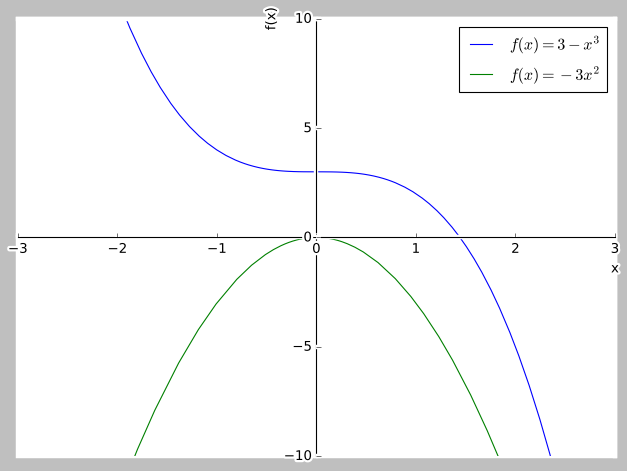

In [98]:
import sympy.plotting.plot as symplot

fx = 3 - x**3

p = symplot(fx, (x, -3, 3), show=False)
p.extend(symplot(sym.diff(fx), (x, -5, 5), show=False))
p[0].label = '$f(x) = %s$' %sym.latex(fx)
p[1].label = '$f(x) = %s$' %sym.latex(sym.diff(fx))
p.xlim = [-3, 3]
p.ylim = [-10, 10]
p.legend = True
p.show()

### Derivatives of trig functions
circular derivatives
$
\frac{d}{dx} \cos(x) = -\sin(x)\\
\frac{d}{dx} -\sin(x) = -\cos(x)\\
\frac{d}{dx} -\cos(x) = \sin(x)\\
\frac{d}{dx} \sin(x) = \cos(x)\\
$


In [99]:
q = sym.symbols('q')
print(sym.diff( sym.cos(q) ))
print(sym.diff( sym.sin(q) ))

-sin(q)
cos(q)


In [101]:
f = sym.cos(q)

for i in range(0, 8):
    display(Math('\\frac{d}{dx}%s = %s' %(sym.latex(f), sym.latex(sym.diff(f)))))
    f = sym.diff(f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

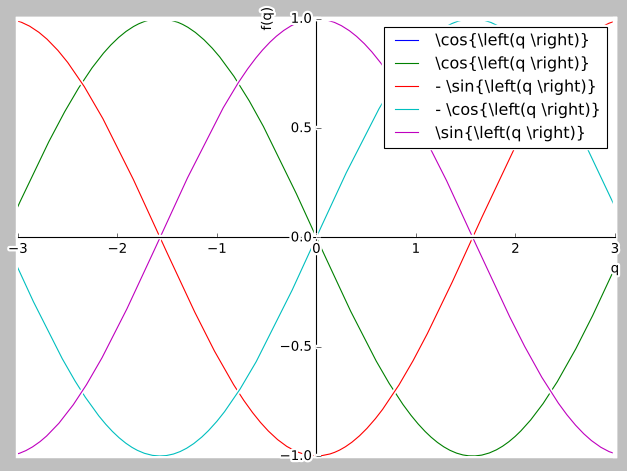

In [106]:
f = sym.cos(q)

p = symplot(f, show=False, label=sym.latex(f))

for i in range(0, 4):
    p.extend(symplot(sym.diff(f), show=False, label=sym.latex(f)))
    f = sym.diff(f)

p.legend = True
p.xlim = [-3, 3]
p.show()

### Tangent line
$
t = f'_a(x-x_a) + f_a
$

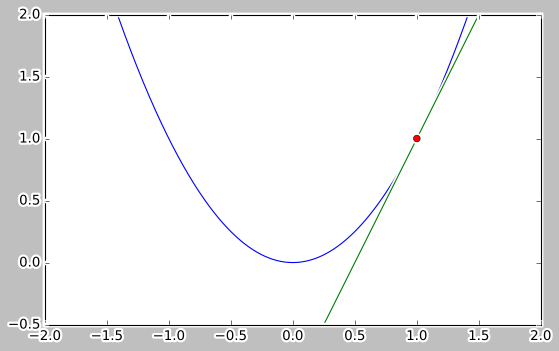

In [119]:
import matplotlib.pyplot as plt

x = sym.symbols('x')

# define a function and its derivative
f = x**2
df = sym.diff(f)

# value of which to compute the tangent line
xa = 1

# get the function and derivate value
fa = f.subs(x, xa)
dfa = df.subs(x , xa)

xx = np.linspace(-2, 2, 2000)
f_fun = sym.lambdify(x, f)(xx)
df_fun = sym.lambdify(x, df)(xx)

# compute and plot tangent line
tanline = dfa * (xx-xa) + fa

plt.plot(xx, f_fun, label='f(x)')
plt.plot(xx, tanline, label='tangent')
plt.plot(xa, fa, 'ro')
plt.axis('square')
plt.axis([-2, 2, -.5, 2])
plt.show()

In [129]:
### Critical Points 

In [131]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

The critical points are: [-1.  1.] [0.]


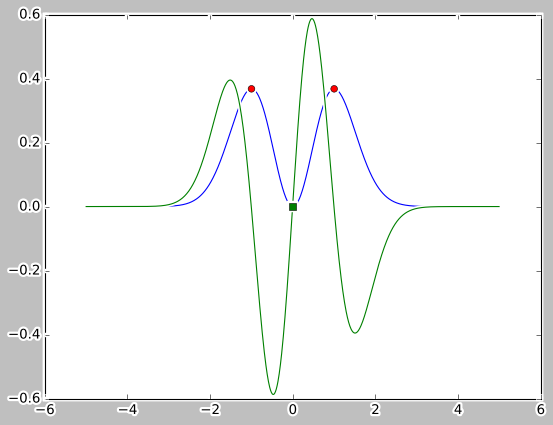

In [159]:
# empirical method
x = np.linspace(-5, 5, 1001)
fx = x**2 * np.exp(-x**2)
dfx = np.diff(fx)/(x[1]-x[0]) 

localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]

print('The critical points are: ' + str(x[localmax]) + ' ' + str(x[localmin]))
plt.plot(x, fx)
plt.plot(x[0:-1], dfx)
plt.plot(x[localmax], fx[localmax], 'ro')
plt.plot(x[localmin], fx[localmin], 'gs')
plt.show()

#### Partial derivatives
$
f(x, y) = 2xy^2\\
\frac{\partial{f}}{\partial{x}}=f_x = 2y^2
$

In [8]:
import sympy as sym
from IPython.display import display, Math

x, y = sym.symbols('x, y')

f = x**2 + x*y**2

display(Math('f = %s' %sym.latex(f)))
display(Math('\\frac{\\partial f}{\\partial x} = %s' %sym.latex(sym.diff(f, x))))
display(Math('\\frac{\\partial f}{\\partial y} = %s' %sym.latex(sym.diff(f, y))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

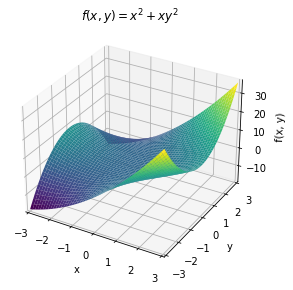

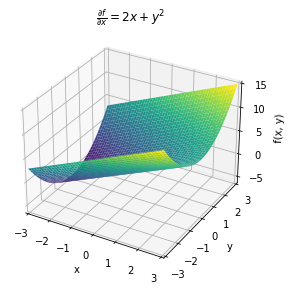

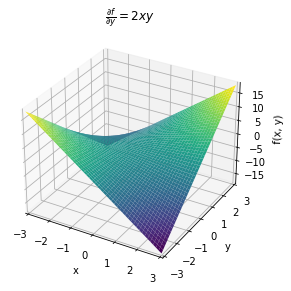

In [17]:
p = sym.plotting.plot3d(f, (x, -3, 3), (y, -3, 3), title='$f(x,y)=%s$' %sym.latex(f))
p = sym.plotting.plot3d(sym.diff(f, x), (x, -3, 3), (y, -3, 3), title='$\\frac{\\partial f}{\\partial x}=%s$' %sym.latex(sym.diff(f,x)))
p = sym.plotting.plot3d(sym.diff(f, y), (x, -3, 3), (y, -3, 3), title='$\\frac{\\partial f}{\\partial y}=%s$' %sym.latex(sym.diff(f,y)))

#### Indefinite and definite integrals
$
\text{definite} \\
\int_a^b \! f(x) \, dx \\
\text{indefinite} \\
\int \! bx^a \, dx = \frac{bx^{a+1}}{a+1} + c \\
$


In [20]:
import sympy as sym
from IPython.display import display, Math

x = sym.symbols('x')
f = x
sym.integrate(f)

x**2/2

In [23]:
sym.integrate(f, (x, 0, 1))

1/2

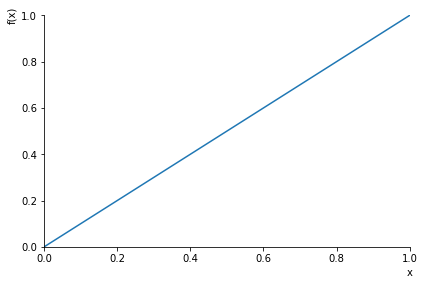

In [25]:
p = sym.plotting.plot(f, show=False)
p.xlim = [0,1]
p.ylim = [0,1]
p.show()